<h1><center>Tarea Muestreo</center></h1>


<center> Sergio Adrian Martínez Tena

**Se agregan librerias necesarias**

In [1]:
from AC import stylizePlot, createFigures, createBinaryHist
from scipy.stats import wasserstein_distance
from scipy.spatial import distance
from matplotlib import pyplot as plt
import numpy as np
import pandas as pd

**Se declaran las funciónes a utilizar**

Función para generar muestras de diferentes tamaños a partir de una distribución, donde $k$ especifica el número de repeticiones para obtener la distribución esperada.

In [2]:
def generateSamples(R:'Muestra', *, dist:'Distribucion real', k:'Repeticion'=1, 
                    plot=False, figsize=(8,8), labels=['A','B']):
    # Diccionario para almacenar las diferentes muestras
    samples = dict()
    # Para cada tamaño de muestra se obtiene la distancia
    for r in R:
        freqSample = 0
        # Numero de repeticiones para obtener la distancia promedio
        for j in range(k):
            # Se obtiene una muestra de tamaño r sin remplazo
            sample = np.random.choice(dist, size=r, replace=False)
            # Se obtienen su frecuencia relativa
            states, f = np.unique(sample, return_counts=True)
            freqSample += f/r
        samples[r] = [states, freqSample/k]
    if plot:
        # Se crea la figura con los axes respectivos
        axes = createFigures(figsize=figsize, xlabel='Candidatos', ylabel='Porcentage de Votos', n_axes=len(R))
        for (r, sample), ax in zip(samples.items(), axes):
            # Se crea la figura para mostrar la distribucion de la muestra
            ax.bar(sample[0],sample[1], color=(140/255,236/255,245/255))
            ax.set_xticks(sample[0], labels=[f'{label}\n({value})'for label,value in zip(labels,sample[1])]);
            ax.set_title(f'Muestra R = {r}', fontdict={'size':16, 'weight':'bold'});
            
    return samples

Función para obtener la distancia de wassertain de la distribución de cada una de las muestras contra la distribución real. En donde $k$ es el número de repeticiones para obtener la distancia esperada y $repetitions$ es las veces que se repite el experimento.

In [3]:
def getDistanceSample(R:'Sample Sizes', *, dist, k=1, repeatitions=1, plot=False, 
                      expected='distance', distance=wasserstein_distance):
    
    if expected == 'sample':
        k1, k2 = 1, k
    else:
        k1, k2 = k, 1
    
    # Si R es un solo numero se convierte a lista
    if type(R) is int:
        R = [R]
    ax = createFigures(figsize=(18,6),xlabel='R', ylabel='Distancia')
    ax.set_title(f'Distancia Entre la Muestra y la Distribucion Real con k = {k} repeticiones', 
                 fontdict={'size':16, 'weight':'bold'});
    # Se obtiene la frecuencia relativa de cada estado de la distribucion
    freqDist = np.unique(dist, return_counts=True)[1]/len(dist)
    # Se repite el muestreo repeat veces
    for i in range(repeatitions): 
        # Arreglo para almacenar la distancia entre cada histograma
        distanceList = np.zeros(len(R))
        for _ in range(k1):
            sampleDist = generateSamples(R, dist=dist, plot=plot, k=k2)
            for j, (_,freqSample) in enumerate(sampleDist.values()):
                distanceList[j] += distance(freqDist, freqSample)
        # Se crea la figura para mostrar la distancia entre las diferentes 
        # muestras de tamaño r y la distribucion real
        ax.plot(R, distanceList/k1, '-o', label=i+1);
    ax.legend()

**Se crea la distibucion de votos real de los candidatos A y B**

In [4]:
# Tamaño de la poblacion
N = 1000000
# Distribucion de votos entre los dos candidatos
candA = np.zeros(int(0.3*N))
candB = np.ones(int(0.7*N))
# Se concantenan los dos arreglos
population = np.concatenate((candA,candB))
np.random.shuffle(population)

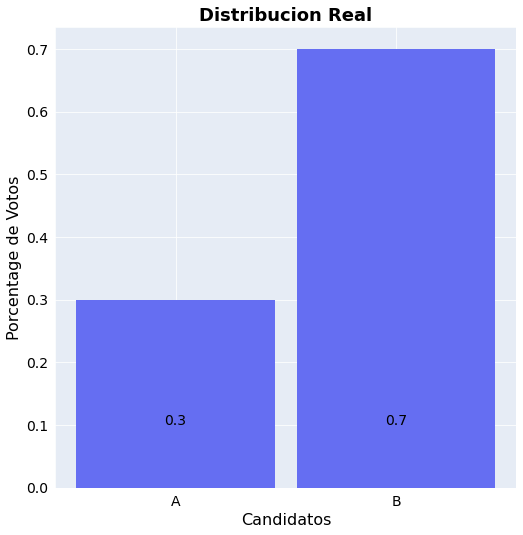

In [5]:
# Se grafica la distribucion real
ax = createFigures(figsize=(8,8),xlabel='Candidatos',ylabel='Porcentage de Votos')
hist = createBinaryHist(population, ax=ax)
hist.set_xticks((0,1), labels=['A','B']);
hist.set_title('Distribucion Real', fontdict={'size':18, 'weight':'bold'});
hist.annotate('0.3', xy=(0-0.05,0.1), fontsize=14);
hist.annotate('0.7', xy=(1-0.05,0.1), fontsize=14);

**Se definen el tamaño de muestras a utilizar**

In [6]:
R = [10, 100, 200, 500, 1000, 5000, 10000]

**Se obtienen la muestras y sus distribuciones**

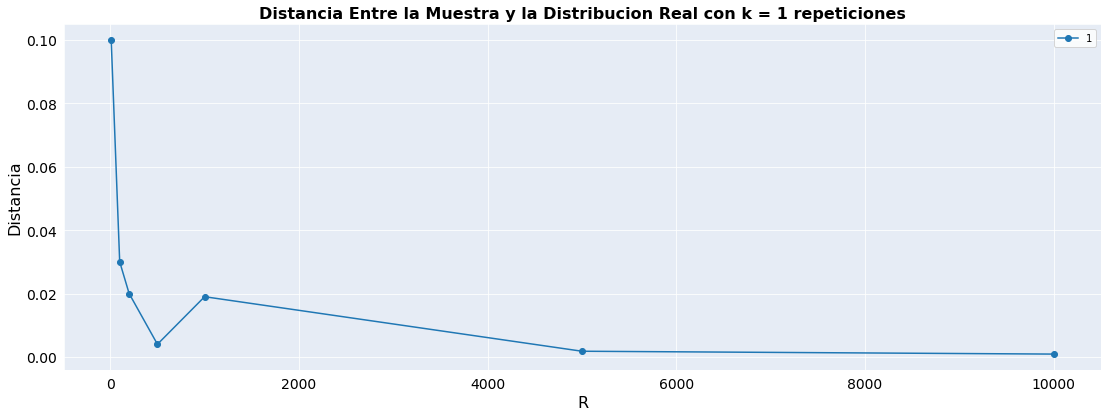

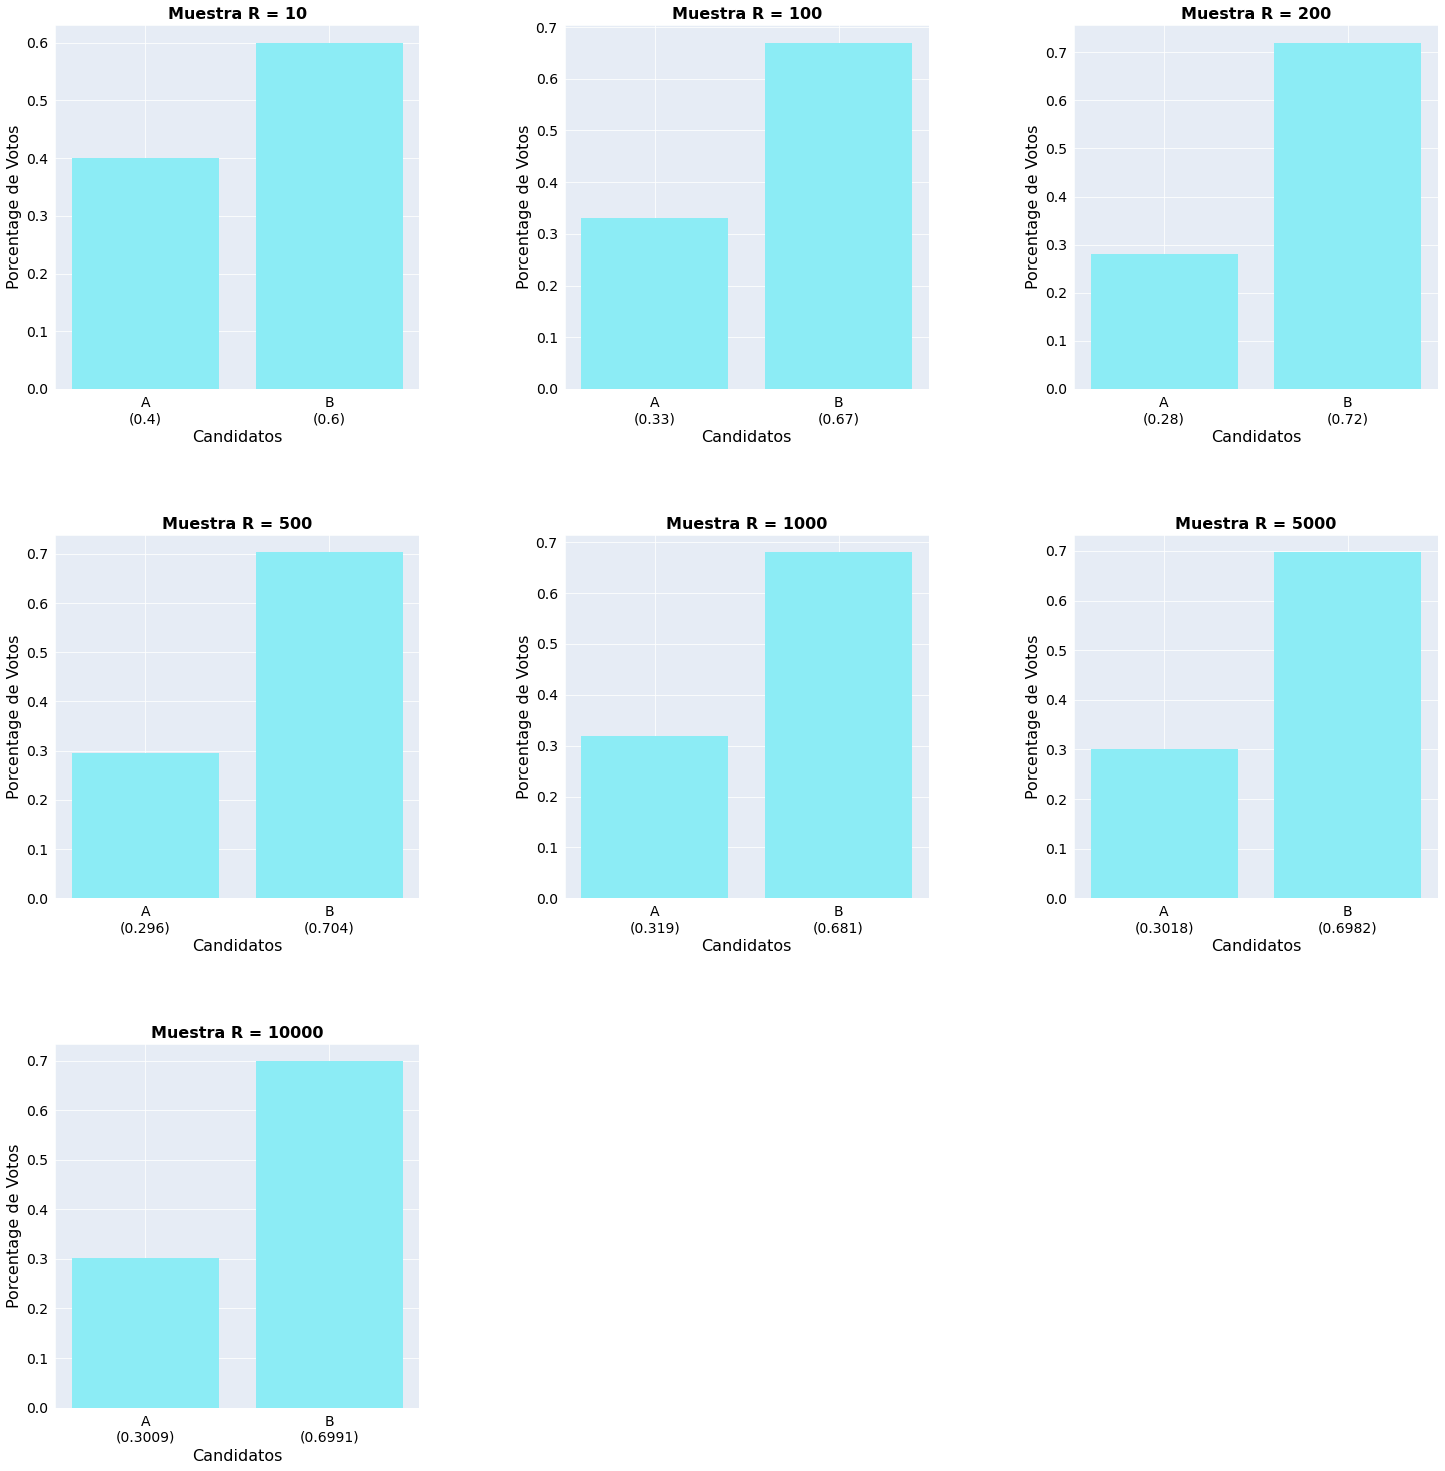

In [11]:
getDistanceSample(R, dist=population, plot=True);

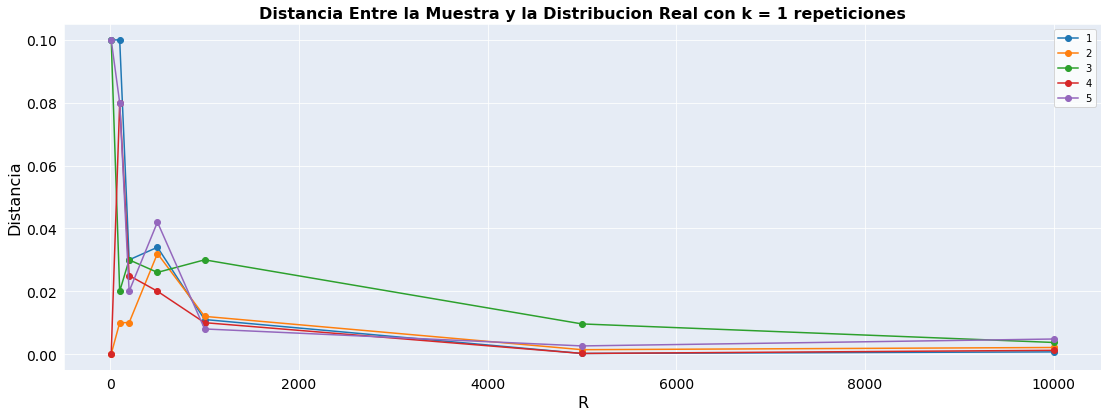

In [19]:
getDistanceSample(R, dist=population, repeatitions=5)

**Se obtienen la muestras y sus distribuciones, repitiendo el muestreo k=10**

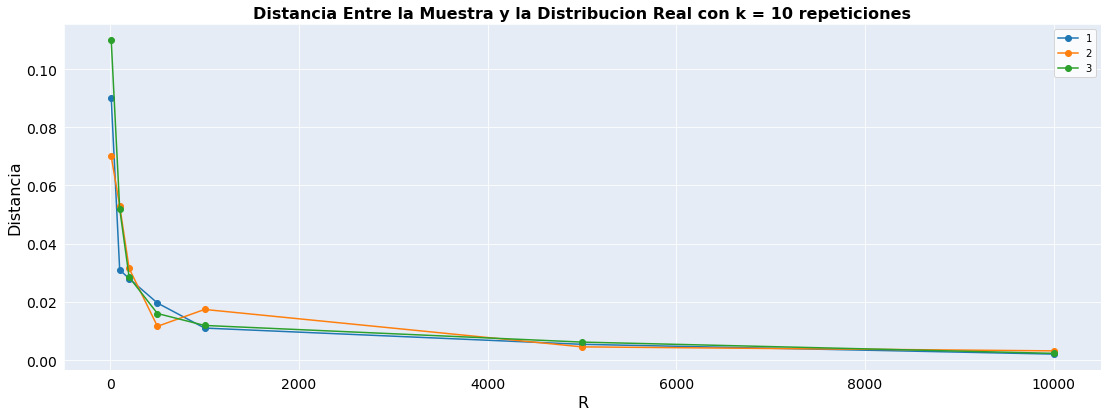

In [13]:
getDistanceSample(R, dist=population, k=10, repeatitions=3)

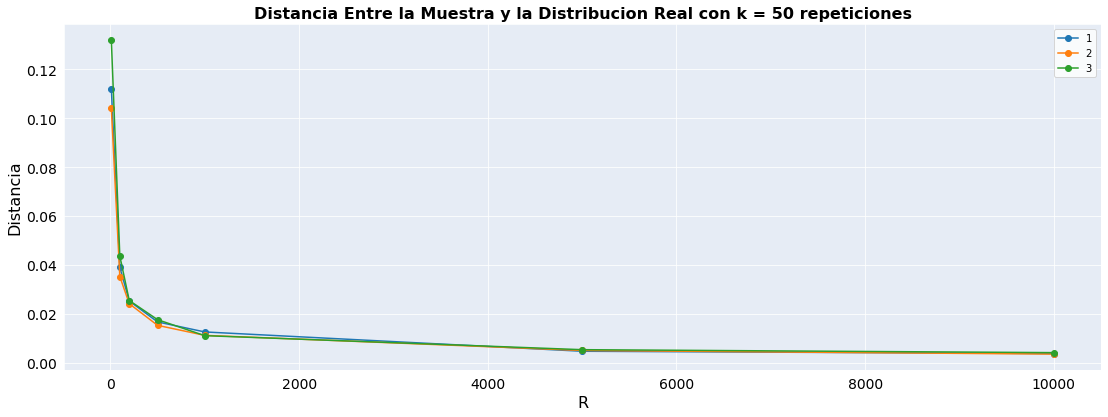

In [10]:
getDistanceSample(R, dist=population, k=50, repeatitions=3)

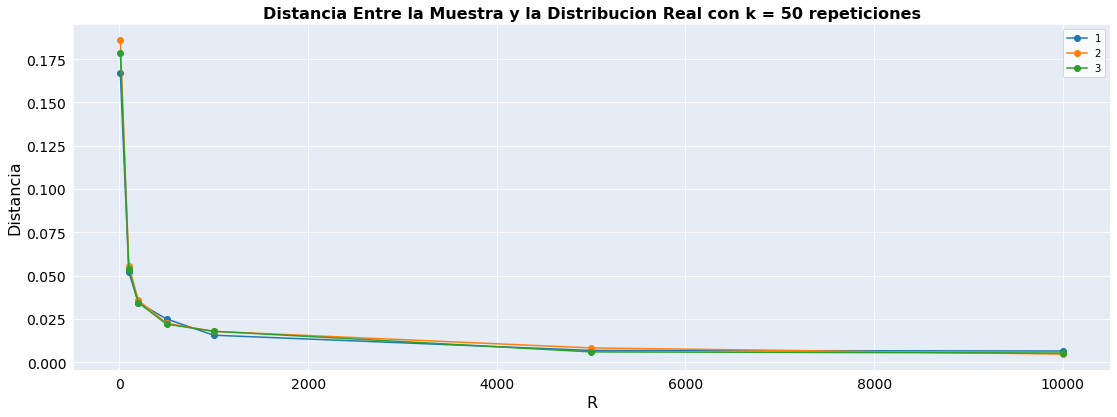

In [20]:
getDistanceSample(R, dist=population, k=50, repeatitions=3, distance=distance.euclidean)

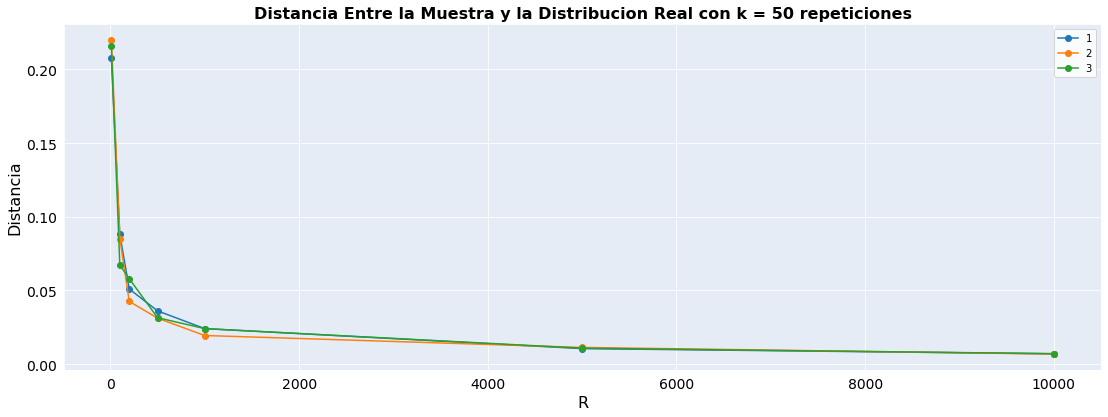

In [21]:
getDistanceSample(R, dist=population, k=50, repeatitions=3, distance=distance.cityblock)